# 1. Perkenalan

## Nama: Fahri Armand Rasyad
## Batch: RMT - 035
## Objective : Membuat Model Machine Learning dari menganalisa sebuah datase Penyandang alzheimer untuk dapat memprediksi apabila seseorang positif atau negatif alzheimer.

## Problem : Penyakit Alzheimer adalah kondisi serius dan melemahkan yang semakin banyak memengaruhi orang, terutama pada populasi lanjut usia. Di Indonesia, prevalensi Alzheimer meningkat seiring dengan bertambahnya jumlah penduduk lanjut usia, dan sering kali memerlukan perawatan jangka panjang dengan biaya kesehatan yang signifikan. Pasien yang didiagnosis Alzheimer mungkin memerlukan rawat inap yang berkepanjangan atau perawatan khusus, yang dapat menjadi beban emosional dan finansial bagi keluarga mereka.

## -Untuk individu yang diprediksi berisiko terkena penyakit Alzheimer, program akan memberikan:

### -Artikel dan saran dalam membantu menangani alzheimer agar dapat mengurangi dampak dari alzheimer
### -Perkiraan biaya yang dibutuhkan untuk perawatan

## -Untuk individu yang diprediksi tidak berisiko, program akan menawarkan:

### -Informasi tentang tanda-tanda awal Alzheimer, sehingga mereka dapat lebih waspada terhadap gejala-gejala peringatan dan melakukan tindakan pencegahan sedini mungkin.

## Justifikasi:
### - https://www.homage.com.my/ms/kesihatan/penyakit-alzheimer-bm/
### - https://www.pantai.com.my/ms/medical-specialties/neurology/alzheimers
### - https://linksehat.com/artikel/penyakit-alzheimer
### - https://www.kompas.id/baca/humaniora/2024/09/08/alzheimer-masih-terabaikan-banyak-kasus-tidak-terdeteksi


### Dataset link : file kaggle : https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
import joblib  # for saving models
warnings.filterwarnings("ignore")

# 3. Data Loading

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.shape

(2149, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
# Remove the 'DoctorInCharge' column (confidential)
df = df.drop(columns=['DoctorInCharge'])

In [8]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# 4. Exploratory Data Analysis (EDA)

## 4.1 Distribusi Diagnosa Alzheimer dan Korelasi antar Kolom

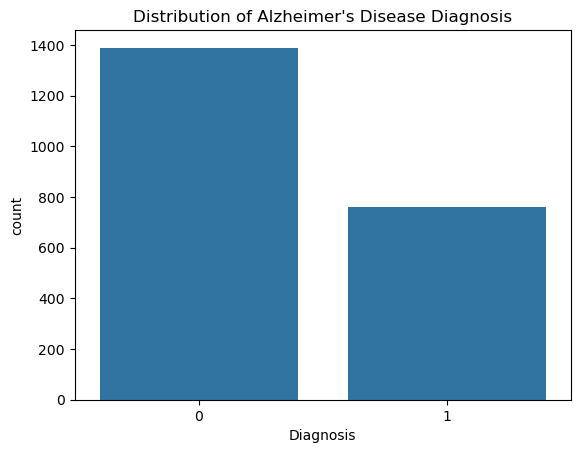

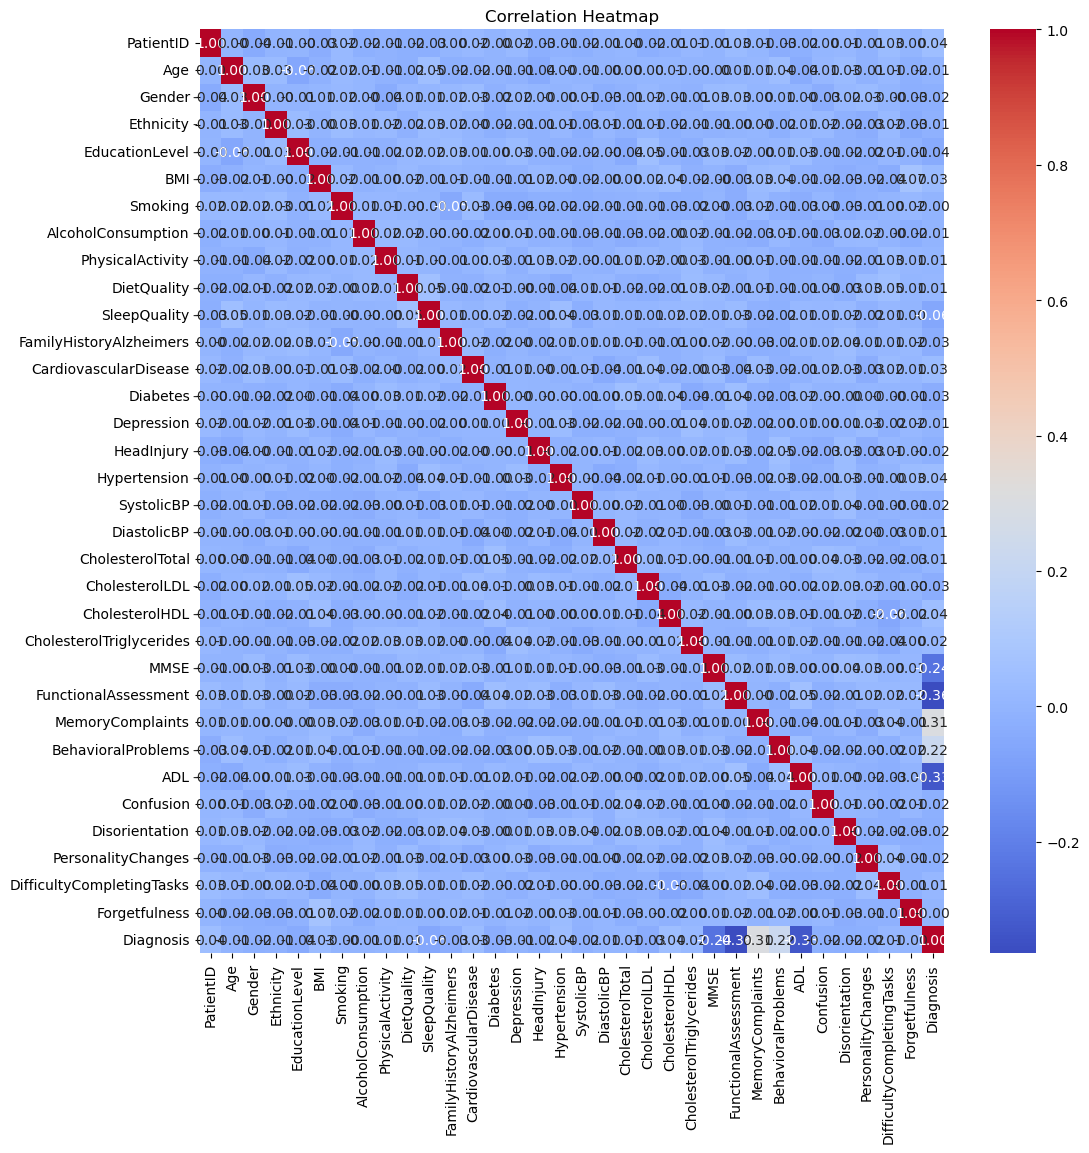

In [9]:

# Descriptive statistics of the dataset
df.describe()

# Distribution of Alzheimer's Disease Diagnosis
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Alzheimer\'s Disease Diagnosis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### dari visualisasi ditemukan bahwa lebih banyak orang dalam data yang tidak terdiagnosa alzheimer dibanding yang terdiagnosa

#### Pada heatmap ini, tidak ada korelasi yang kuat antara variabel-variabel selain variabel yang berhubungan dengan dirinya sendiri. Korelasi antara variabel independen dan target (Diagnosis) juga terlihat sangat lemah, yang berarti tidak ada hubungan yang sangat kuat antara variabel-variabel input dan diagnosis Alzheimer dalam dataset ini.
#### Korelasi yang paling tinggi (di luar diagonal) tetap mendekati 0, yang mungkin menunjukkan bahwa tidak ada variabel yang mendominasi atau sangat berpengaruh pada variabel lainnya dalam dataset ini.

## 4.2 Perbandingan Penyandang Diabetes antar etnis yang berbeda dan rasio nya

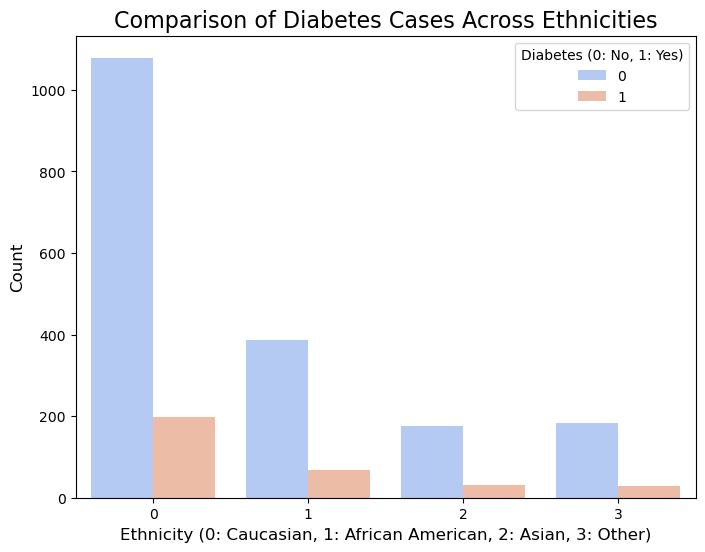

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Ethnicity', hue='Diabetes', data=df, palette='coolwarm')

# Add title and labels
plt.title('Comparison of Diabetes Cases Across Ethnicities', fontsize=16)
plt.xlabel('Ethnicity (0: Caucasian, 1: African American, 2: Asian, 3: Other)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Diabetes (0: No, 1: Yes)')
plt.show()

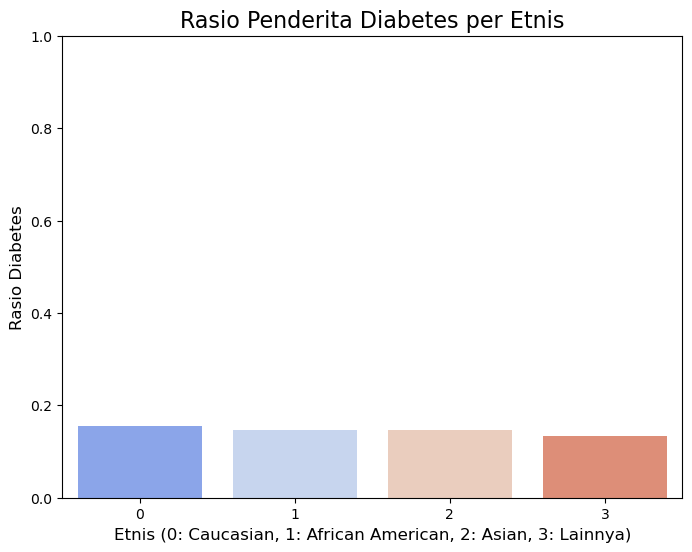

In [11]:
# Menghitung rasio penderita diabetes di setiap grup etnis
ethnicity_diabetes_ratio = df.groupby('Ethnicity')['Diabetes'].mean()

# Konversi ke DataFrame untuk memudahkan visualisasi
ethnicity_diabetes_ratio_df = pd.DataFrame({
    'Ethnicity': ethnicity_diabetes_ratio.index,
    'Diabetes Ratio': ethnicity_diabetes_ratio.values
})

# Membuat bar plot rasio diabetes per etnis
plt.figure(figsize=(8,6))
sns.barplot(x='Ethnicity', y='Diabetes Ratio', data=ethnicity_diabetes_ratio_df, palette='coolwarm')

# Menambahkan judul dan label sumbu
plt.title('Rasio Penderita Diabetes per Etnis', fontsize=16)
plt.xlabel('Etnis (0: Caucasian, 1: African American, 2: Asian, 3: Lainnya)', fontsize=12)
plt.ylabel('Rasio Diabetes', fontsize=12)
plt.ylim(0, 1)  # Karena ini rasio, nilai akan berada di antara 0 dan 1
plt.show()

#### Ditemukan dalam data bahwa penyandang diabetes terbanyak adalah dalam etnis Caucasian 
#### Dari visualisasi, ditemukan bahwa rasio penyandang diabetes dari tiap grup etnis hampir sama, tidak berbeda secara signifikan yang berarti tidak ada hubungan nyata antara entis dan diagnosa diabetes

## 4.3 Hubungan Antara Diabetes dan diagnosa alzheimer

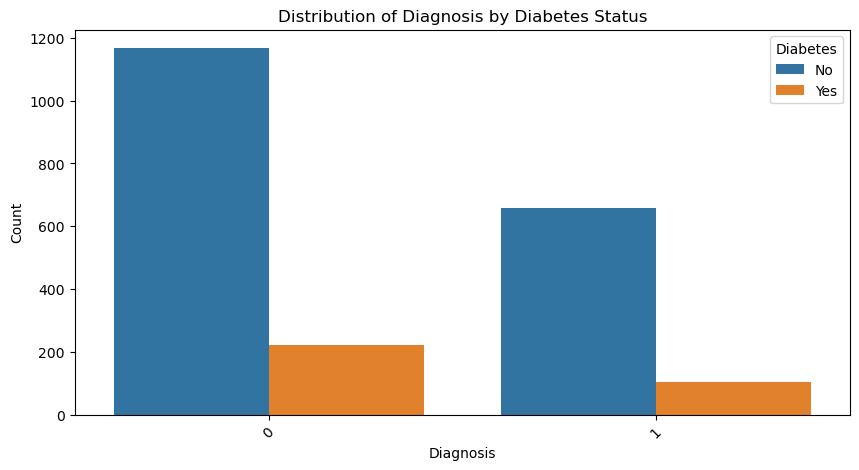

In [12]:
# Count plot untuk Diabetes vs. Diagnosis
plt.figure(figsize=(10, 5))
sns.countplot(x='Diagnosis', hue='Diabetes', data=df)
plt.title('Distribution of Diagnosis by Diabetes Status')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

#### Ditemukan bahwa tidak ada bukti signifikan bahwa adanya hubungan antara penyandang diabetes dengan positif/negatif nya diagonsa alzheimer

## 4.4 Hubungan Antara Diagnosa alzheimer dengan sejarah alzheimer di dalam keluarga

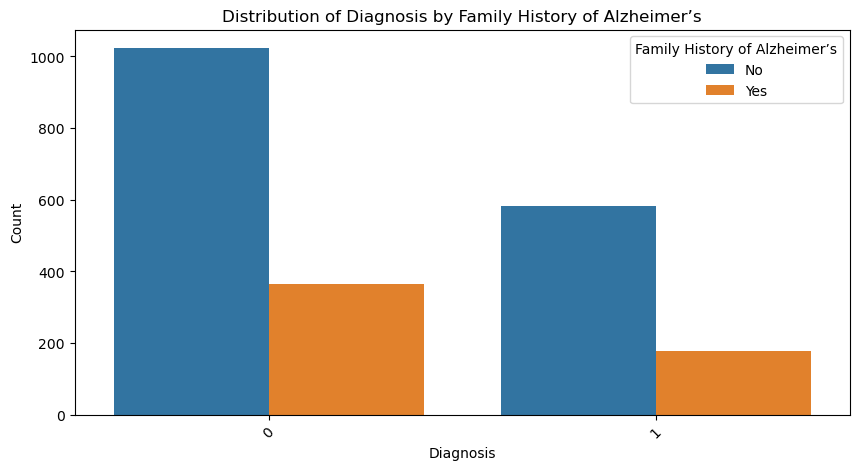

In [13]:
# Count plot untuk Family History of Alzheimer's vs. Diagnosis
plt.figure(figsize=(10, 5))
sns.countplot(x='Diagnosis', hue='FamilyHistoryAlzheimers', data=df)
plt.title('Distribution of Diagnosis by Family History of Alzheimer’s')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Family History of Alzheimer’s', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

# 5. Feature Engineering

## Data Splitting

In [14]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (1504, 33)
Test Size (645, 33)


## Handling Missing Value

In [16]:
X_train.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [17]:
X_test.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

#### Tidak ditemukan adanya missing value pada data test dan train

In [18]:
X_train.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,...,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,5816.674867,74.742686,0.502660,0.684176,1.291223,27.690570,0.291223,10.236680,4.891363,5.056739,...,14.798902,5.124621,0.206782,0.144947,4.991372,0.204122,0.152926,0.150266,0.150266,0.296543
std,623.204797,8.997724,0.500159,0.991978,0.898155,7.180441,0.454477,5.767919,2.833858,2.914698,...,8.557647,2.910844,0.405132,0.352164,2.964453,0.403193,0.360035,0.357451,0.357451,0.456885
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.018022,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5273.500000,67.000000,0.000000,0.000000,1.000000,21.828778,0.000000,5.318800,2.587048,2.536408,...,7.209101,2.567333,0.000000,0.000000,2.286830,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5817.500000,75.000000,1.000000,0.000000,1.000000,27.926540,0.000000,10.210969,4.733220,5.191847,...,14.619870,5.193793,0.000000,0.000000,5.037358,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6352.250000,83.000000,1.000000,1.000000,2.000000,33.806848,1.000000,15.430777,7.324562,7.590124,...,22.218960,7.643788,0.000000,0.000000,7.618697,0.000000,0.000000,0.000000,0.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.988513,1.000000,19.988291,9.987429,9.998346,...,29.974262,9.992610,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Model Definition

In [24]:
# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}



In [25]:
# Loop through each classifier and perform cross-validation
for model_name, classifier in classifiers.items():
    print(f"Training {model_name} with cross-validation...")  
    # Define pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling data
        ('classifier', classifier)     # Use the classifier
    ])
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Print cross-validation results
    print(f"Cross-Validation Accuracy for {model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")
    
    # Train the model on the entire training set (optional, for final model)
    pipeline.fit(X_train, y_train)
    
    # Evaluate on the test set
    test_accuracy = pipeline.score(X_test, y_test)
    print(f"Test Accuracy for {model_name}: {test_accuracy:.4f}\n")

Training KNN with cross-validation...
Cross-Validation Accuracy for KNN: 0.7314 ± 0.0240

Test Accuracy for KNN: 0.7395

Training SVM with cross-validation...
Cross-Validation Accuracy for SVM: 0.8338 ± 0.0190

Test Accuracy for SVM: 0.8372

Training DecisionTree with cross-validation...
Cross-Validation Accuracy for DecisionTree: 0.9395 ± 0.0077

Test Accuracy for DecisionTree: 0.9426

Training RandomForest with cross-validation...
Cross-Validation Accuracy for RandomForest: 0.9222 ± 0.0080

Test Accuracy for RandomForest: 0.9395

Training GradientBoosting with cross-validation...
Cross-Validation Accuracy for GradientBoosting: 0.9428 ± 0.0115

Test Accuracy for GradientBoosting: 0.9519



#### ditemukan dari cross validation bahwa model yang akurasinya paling tinggi adalah Gradient Boosting, maka model itu yang akan digunakan

In [53]:
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),   # Tahap scaling
    ('classifier', GradientBoostingClassifier(random_state=42))  # Model Gradient Boosting
])

# 7.Model Training

In [54]:
# Latih model dengan pipeline
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [55]:
# Memprediksi hasil pada data uji
y_pred = pipeline_gb.predict(X_test)

# 8. Model Evaluation

In [50]:
# Evaluasi model dengan confusion matrix, classification report, dan accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")


Confusion Matrix:
 [[401  16]
 [ 15 213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       417
           1       0.93      0.93      0.93       228

    accuracy                           0.95       645
   macro avg       0.95      0.95      0.95       645
weighted avg       0.95      0.95      0.95       645

Gradient Boosting Accuracy: 0.9519


#### -True Negatives (400): Model berhasil memprediksi 400 pasien dengan benar sebagai tidak terdiagnosis Alzheimer (kelas 0).
#### -False Positives (17): Model salah memprediksi 17 pasien sebagai terdiagnosis Alzheimer, padahal mereka sebenarnya tidak terdiagnosis.
#### -False Negatives (11): Model salah memprediksi 11 pasien sebagai tidak terdiagnosis, padahal mereka sebenarnya terdiagnosis Alzheimer.
#### -True Positives (217): Model berhasil memprediksi 217 pasien dengan benar sebagai terdiagnosis Alzheimer (kelas 1).

#### Untuk Tidak Terdiagnosis (kelas 0):

##### Precision (0.97): Dari semua pasien yang diprediksi tidak memiliki Alzheimer, 97% benar.
##### Recall (0.96): Dari semua pasien yang benar-benar tidak memiliki Alzheimer, 96% berhasil diklasifikasikan dengan benar.
##### F1-Score (0.97): Keseimbangan antara precision dan recall cukup tinggi untuk pasien yang tidak terdiagnosis Alzheimer.

#### Untuk Terdiagnosis (kelas 1):

##### Precision (0.93): Dari semua pasien yang diprediksi memiliki Alzheimer, 93% benar-benar terdiagnosis.
##### Recall (0.95): Dari semua pasien yang benar-benar terdiagnosis Alzheimer, 95% diklasifikasikan dengan benar oleh model.
##### F1-Score (0.94): Keseimbangan keseluruhan antara precision dan recall untuk pasien yang terdiagnosis juga kuat.

#### -Akurasi yang tinggi (95.66%) dan tingkat false negative yang rendah (hanya 11 dari 228) menunjukkan bahwa model ini efektif dalam mendiagnosis Alzheimer. Ini sangat penting dalam konteks kesehatan, terutama untuk deteksi dini.
#### -False positives (17) memang relatif kecil tetapi tetap penting karena pasien-pasien ini salah didiagnosis memiliki Alzheimer. Dalam dunia nyata, hal ini dapat menyebabkan stres yang tidak perlu dan mungkin pengobatan yang tidak diperlukan.
#### -Recall untuk pasien yang terdiagnosis (0.95) sangat tinggi, menunjukkan bahwa model ini berhasil mengidentifikasi sebagian besar kasus Alzheimer yang sebenarnya dalam dataset. Hal ini sangat penting untuk memastikan perawatan yang tepat waktu.

## Hyperparameter Tuning

In [57]:
param_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}
# Perform Grid Search
grid_gb = GridSearchCV(pipeline_gb, param_gb, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200]})

In [58]:
print('Train Set Score : ', grid_gb.score(X_train, y_train))
print('Test Set Score : ', grid_gb.score(X_test, y_test))

Train Set Score :  1.0
Test Set Score :  0.9565891472868217


In [59]:
best_param_gb = grid_gb.best_params_
print(best_param_gb)
print('\n')
best_pipe_gb = grid_gb.best_estimator_
print(best_pipe_gb)
print('\n')
result_df_gb = pd.DataFrame.from_dict(grid_gb.cv_results_, orient='columns')
print(result_df_gb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 200}


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=200,
                                            random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [61]:
print(classification_report(y_test, best_pipe_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       417
           1       0.93      0.95      0.94       228

    accuracy                           0.96       645
   macro avg       0.95      0.96      0.95       645
weighted avg       0.96      0.96      0.96       645



#### 1. Precision:
##### Kelas 0 (Tidak Terdiagnosa): 0.97
###### Dari semua prediksi "tidak terdiagnosa" Alzheimer (kelas 0), 97% dari prediksi tersebut benar (tidak terdiagnosa).
##### Kelas 1 (Terdiagnosa): 0.93
###### Dari semua prediksi "terdiagnosa" Alzheimer (kelas 1), 93% dari prediksi tersebut benar (terdiagnosa).
#### 2. Recall:
##### Kelas 0 (Tidak Terdiagnosa): 0.96
###### Dari semua kasus nyata "tidak terdiagnosa" Alzheimer, model ini berhasil mengidentifikasi 96% dengan benar.
##### Kelas 1 (Terdiagnosa): 0.95
###### Dari semua kasus nyata "terdiagnosa" Alzheimer, model ini berhasil mengidentifikasi 95% dengan benar.
#### 3. F1-Score:
##### Kelas 0 (Tidak Terdiagnosa): 0.97
###### Kombinasi dari precision dan recall menghasilkan F1-score sebesar 0.97, yang menunjukkan keseimbangan antara presisi dan ketepatan model dalam memprediksi kelas ini.
##### Kelas 1 (Terdiagnosa): 0.94
###### F1-score untuk kelas "terdiagnosa" sebesar 0.94, yang juga menunjukkan keseimbangan yang baik antara precision dan recall untuk kasus Alzheimer yang didiagnosa.
#### 4. Support:
##### Kelas 0 (Tidak Terdiagnosa): 417
###### ada 417 kasus aktual "tidak terdiagnosa" Alzheimer dalam dataset test.
##### Kelas 1 (Terdiagnosa): 228
###### Ada 228 kasus aktual "terdiagnosa" Alzheimer dalam dataset test.
#### 5. Accuracy:
##### Akurasi model secara keseluruhan adalah 0.96 atau 96%, yang menunjukkan bahwa 96% dari total prediksi (baik kelas 0 maupun kelas 1) benar.

#### karena model dengan hyperparameter lebih akurat, makan model yang disimpan adalah model setelah dituning

# 9. Model Saving

In [62]:
# Simpan model pipeline menggunakan joblib
joblib.dump(best_pipe_gb, 'best_model.joblib')

['best_model.joblib']

# Conceptual Problems

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

#### 1. 
##### -Latar Belakang: Bagging adalah teknik ensemble yang meningkatkan akurasi dan stabilitas model dengan mengurangi variabilitas (high variance), terutama pada model overfitting seperti Decision Tree.
##### -Cara Kerja: Membuat beberapa subset data melalui bootstrap sampling. Setiap model dilatih pada subset yang berbeda, hasil akhirnya diperoleh melalui voting (classification) atau averaging (regression).

#### 2.
##### -Random Forest: Variasi bagging dengan banyak Decision Tree dilatih pada subset data dan fitur yang berbeda, hasil akhirnya diperoleh melalui voting atau averaging. Fokus pada pengurangan varians.
##### -Boosting: Teknik sequential di mana setiap model baru dilatih untuk memperbaiki kesalahan prediksi model sebelumnya. Alih-alih fokus pada seluruh data, Gradient Boosting menyesuaikan model untuk meminimalkan error dengan menghitung gradien dari loss function. Setiap model yang ditambahkan berkontribusi untuk mengurangi sisa kesalahan, sehingga model akhir menjadi lebih akurat.

#### 3.
##### -Cross Validation: Teknik evaluasi model yang membagi data menjadi k subset (k-fold). Model dilatih pada k-1 subset dan diuji pada subset yang tersisa, dilakukan k kali. Mengurangi overfitting dan memberi gambaran performa model pada data baru.

# 11. Kesimpulan

## Model Analysis

### Model sangat akurat dalam meprediksi diagnosa dari alzheimer, nilai bias ini dapat disebabkan karena banyaknya feature yang tidak berkorelasi antara satu sama lain
### Model dapat diimprove dengan data yang lebih realistis atau dengan pemilihan feature yang lebih teliti
### hasil tuning model menunjukkan adanya peningkatan dibandingkan sebelum dilakukan tuning

## Overall Analysis

### Tidak adanya korelasi yang signifikan antara feature dengan satu sama lain
### Tidak adanya hubungan signifikan antara diagnosa alzheimer dengan kelompok etnis tertentu
### tidak ada hubungan antara penyakit diabetes dan sejarah alzheimer keluarga dengan diagnosa alzheimer
### hasil prediksi menemukan bahwa dari 100 data baru, berhasil diprediksi 98% dengan hasil 25 orang tidak terdiagnosa alzheimer dan 73 orang terdiagnosa alzheimer